In [8]:
!pip install wordcloud
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
GB_comments = pd.read_csv("C:/Users/Swastik/OneDrive/Desktop/SMA-pracc-final/SMA_datasets/SMA-REAL-DATASETS/SMA SENTIMENT ANALYSIS/GBcommentsclean.csv", on_bad_lines='skip')

In [10]:
GB_comments['comment_text'] = GB_comments['comment_text'].str.replace("[^a-zA-Z#]", " ") 
GB_comments['comment_text'] = GB_comments['comment_text'].apply(lambda x: ' '.join([str(w) for w in x.split() if len(w)>3])) 
GB_comments['comment_text'] = GB_comments['comment_text'].apply(lambda x:x.lower()) 
tokenized_tweet = GB_comments['comment_text'].apply(lambda x: x.split())  
tokenized_tweet.head()

C:\Users\Swastik\AppData\Local\Temp\ipykernel_21652\3160580014.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  GB_comments['comment_text'] = GB_comments['comment_text'].str.replace("[^a-zA-Z#]", " ")


0    [more, accurate, call, because, price, closer,...
1                        [there, with, samsung, phone]
2    [thank, gosh, place, watch, without, having, s...
3    [what, happened, home, button, iphone, cough, ...
4    [power, disease, care, cure, keep, caring, you...
Name: comment_text, dtype: object

In [11]:
GB_comments = pd.read_csv("C:/Users/Swastik/OneDrive/Desktop/SMA-pracc-final/SMA_datasets/SMA-REAL-DATASETS/SMA SENTIMENT ANALYSIS/GBcommentssentiments.csv", on_bad_lines='skip')

In [12]:
GB_comments['Sentiment'] = GB_comments['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))
GB_comments.head()
GB_comments.Sentiment.value_counts()    


Positive    331817
Neutral     267098
Negative    119508
Name: Sentiment, dtype: int64

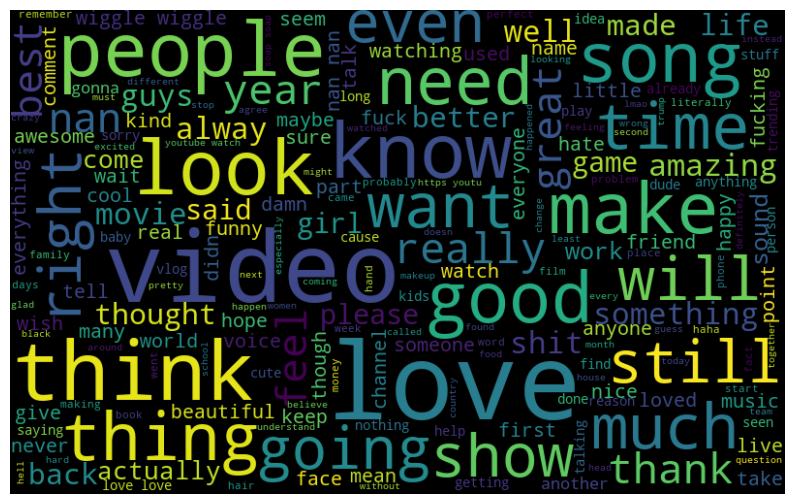

In [13]:
all_words = ' '.join([str(text) for text in GB_comments['comment_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()   


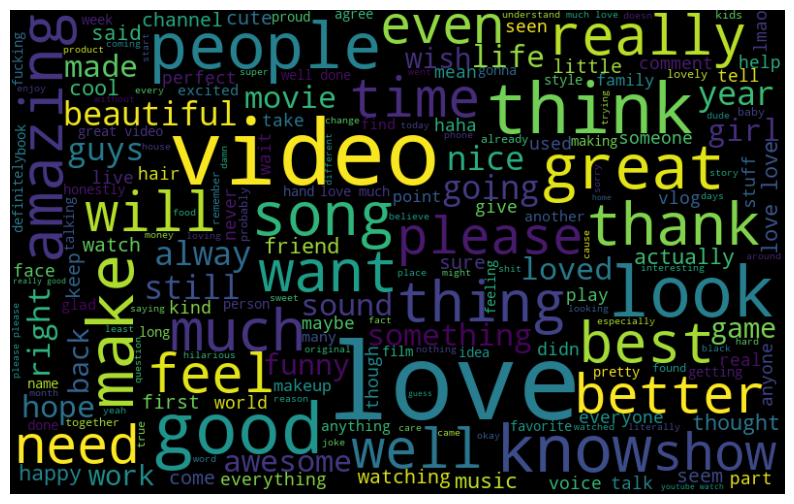

In [14]:
all_words_posi = ' '.join([text for text in GB_comments['comment_text'][GB_comments.Sentiment == 'Positive']])   
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)      
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show() 